# Теория

### Идея
Если взять несколько методов научить их последовательно исправлять ошибки друг друга, качество такой системы будет выше, чем каждого из методов по отдельности.

Лучше, если алгоритмы неустойчивы к выбросам в данных: поэтому для ансамблей берут Регрессию и Деревья Решений.

### Как собрать ансамбль?
- ансамбль собирают из supervised-алгоритмов, потому что важно знать, в чем/где ошибаются модели
- в плане последовательности можно собрать как угодно, но опытным путем нашлись три эффективных способа: *стэкинг*, *бэггинг* и *бустинг*


### где используются ансамбли
- Везде, где можно применять классические алгоритмы (ансамбли дают более точные результаты)
- Поисковые системы (ранжирование реультатов)
- Компьютерное зрение (распознавание объектов)

### Из чего состоят ансамбли? 

Решающее дерево (Decision Tree) - это метод машинного обучения, который использует древовидную структуру для принятия решений. В процессе построения дерева, каждый узел(разветвление) рассматривается как "вопрос" с ответом "да" или "нет", в зависимости от значения выбранного признака. Когда дерево построено, оно может быть использовано для классификации новых объектов. Процесс классификации состоит в том, чтобы проходить по дереву, начиная с корневого узла, и переходить в соответствующий узел на основе ответа "да" или "нет", пока не будет достигнут *лист*, содержащий ответ.

**Как разбиваются данные**
Алгоритм построения решающего дерева начинается с корневого узла, который содержит весь набор данных для обучения. Затем алгоритм выбирает наиболее важный признак из набора данных и использует его для разбиения данных на подмножества. Дальше, для каждого полученного подмножества данных, алгоритм рекурсивно повторяет процедуру разбиения, пока не будет достигнут *критерий остановки*.

Критерии остановки могут варьироваться в зависимости от задачи, которую необходимо решить. Например, дерево может быть остановлено, когда случается одно из условий:
- достигнута определенная глубина дерева,
- количество объектов в листе достигает заданного порога,
- уменьшение ошибки при дальнейшем разбиении становится незначительным


Решающие деревья часто используются для решения задач классификации и регрессии, так как они легко интерпретируемы и позволяют анализировать важность признаков в задаче.

## Stacking

Идея: на одних и тех же данных обучаем несколько разных алгоритмов (например, классификации). Передаем реультаты финальному, он принимает решение (обычно это регрессия).

<img alt="" width="900" height="600" src="https://miro.medium.com/max/1892/0*GHYCJIjkkrP5ZgPh.png">

*С добавлением новых моделей в ансамбль, мы не повысим качество предсказаний*

## Bagging

Идея: несколько раз тренируем один и тот же алгоритм на разных подвыборках из данных. В результате усредняем ответы и определяем финальный. 
<img alt="" width="700" height="400" src="https://miro.medium.com/max/1920/1*DFHUbdz6EyOuMYP4pDnFlw.jpeg">

#[ссылка на картинку](https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de)

Самый популярный бэггинг - это [Random Forest](https://ru.wikipedia.org/wiki/Random_forest) (набор решающих деревьев)<br>
Бэггинг -- эффективный метод, если у вас небольшой датасет.<br>
[Чем бэггинг отличается от кросс-валидации?](https://www.kaggle.com/questions-and-answers/120778)

## Boosting

Идея: обучаем алгоритмы последовательно, каждый следующий уделяет внимание ошибкам предыдущего. Продолжаем, пока метрики не станут хорошими

<img alt="Boosting procedure" src="https://pluralsight2.imgix.net/guides/a9a5ff4e-b617-4afe-b27b-d96793defa87_6.jpg">

[ссылка на картинку](https://www.pluralsight.com/guides/ensemble-methods:-bagging-versus-boosting)

[статья про популярные типы бустинга](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db)

### разница между бэггингом и бустингом

<img alt="Bagging, Boosting" width="700" height="400" src="https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg">

**Когда что использовать?**
- Бэггинг, если у данных высокая дисперсия
- Бустинг, если данные неравномерно распределены

**Bagging VS Boosting**

Нет одноначного ответа, что лучше, это зависит от задачи и данных. Если модель хорошо работает на обучающих данных, но плохо на тестовых, то в данных может быть высокая диспрерсия. Если модель плохо работает на обучающих данных, стоит проверить распределение классов/параметров.
Предварительно стоит проаналиировать данные, затем попробовать несколько моделей, постепенно изменяя параметры.

# Практика

Поработаем с уже известным нам датасетом [спам-сообщений](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [1]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


## подготовим данные

In [3]:
data = pd.read_csv('spam.csv',encoding = "latin-1" )
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Сделаем немного предобработки данных: удалим ненужные колонки, а нужные удобно переименуем

In [4]:
# удалим ненужные колонки
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1, inplace=True) 

# переименуем нужные колонки
data.rename(columns={"v1": "label", "v2": "content"}, inplace=True) 

# изменим значения в первой колонке: 'spam' в 1  и 'ham' в 0
data["label"]=data["label"].map({'spam':1,'ham':0}) 

data.head()

,label,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### немножко DA

Мы помним,  что распределение классов в датасете неравномерное: спама в 3 раза меньше, чем нормальных сообщений

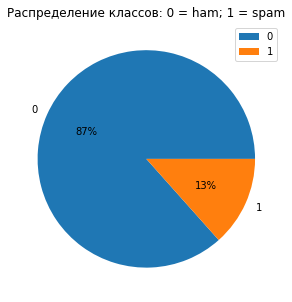

In [5]:
classes = pd.value_counts(data["label"])

classes.plot(kind='pie',figsize=(5,5),autopct='%0.f%%', legend=True, title ="Распределение классов: 0 = ham; 1 = spam") 


plt.ylabel('')

plt.show()

Давайте сбалансируем классы: 
-  для класса 1 возьмем все сэмплы спама
- для класса 0 из подвыборки обычных писем возьмем часть, равную подвыборке спама

Для этого нужно выяснить, сколько семплов спама в датасете

In [6]:
data.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [7]:
# так сбалансируем классы

data_balanced = data[data.label == 1].append(data[data.label == 0].sample(n=747))

In [8]:
# проверяем классы
data_balanced.label.value_counts()

1    747
0    747
Name: label, dtype: int64

In [9]:
data_balanced.shape

(1494, 2)

### векторизуем тексты

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(data_balanced['content'])

In [33]:
# разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, data_balanced["label"], test_size=0.15, random_state=25)

In [25]:
print(X_train.shape, X_test.shape)

(1269, 4395) (225, 4395)


## Решающее дерево

Сегодня мы говорим о способах сделать "конструктор" из алгоритмов, и "кубиком" в таком конструкторе будет алгоритм *решающего дерева* или *дерева решений*(decision tree).
Сначала попробуем обучить одно такое дерево: 

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree_clf = DecisionTreeClassifier()

In [35]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
tree_y_pred = tree_clf.predict(X_test)

In [31]:
len(tree_y_pred)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1])

In [37]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.92      0.92      0.92       119

    accuracy                           0.92       225
   macro avg       0.92      0.92      0.92       225
weighted avg       0.92      0.92      0.92       225



In [42]:
print(confusion_matrix(y_test, tree_y_pred))

[[ 97   9]
 [  9 110]]


Можем рассматривать эти результаты как baseline и далее экспериментировать с более сложными конструкциями.  Время строить ансамбли!

## Bagging

Теперь обучим набор деревьев: Random Forest


Параметры модели: 
- n_estimators : число деревьев в ансамбле (лесе)
- max_depth : глубина дерева 
- verbose : пояснения о процессе обучения

In [47]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=500, verbose=1)

In [48]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.1s finished


RandomForestClassifier(n_estimators=500, verbose=1)

In [49]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


In [50]:
len(forest_y_pred)

225

**Evaluation:** давайте оценим модель метриками классификации

In [51]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       106
           1       0.98      0.92      0.95       119

    accuracy                           0.95       225
   macro avg       0.95      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225



In [52]:
confusion_matrix(y_test, forest_y_pred)

array([[104,   2],
       [ 10, 109]])

In [53]:
forest.("forest") # how to save

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

## Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=10, verbose=10)

In [57]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3332           32.27s
         2           1.2852           33.57s
         3           1.2438           29.93s
         4           1.2068           27.67s
         5           1.1732           26.02s
         6           1.1437           24.23s
         7           1.1167           22.48s
         8           1.0907           21.57s
         9           1.0669           21.33s
        10           1.0439           20.36s
        11           1.0241           20.57s
        12           1.0045           20.84s
        13           0.9862           20.30s
        14           0.9694           20.07s
        15           0.9531           19.84s
        16           0.9376           19.38s
        17           0.9230           18.90s
        18           0.9088           18.71s
        19           0.8951           19.07s
        20           0.8825           18.85s
        21           0.8687           18.50s
        2

GradientBoostingClassifier(n_estimators=500, random_state=10, verbose=10)

In [58]:
gb_y_pred = gb_clf.predict(X_test)

In [59]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       106
           1       0.99      0.89      0.94       119

    accuracy                           0.94       225
   macro avg       0.94      0.94      0.94       225
weighted avg       0.94      0.94      0.94       225



In [60]:
print(confusion_matrix(y_test, gb_y_pred))

[[105   1]
 [ 13 106]]


In [66]:
data_balanced["len"] = data_balanced.content.apply(lambda x: len(x))

<AxesSubplot:ylabel='Frequency'>

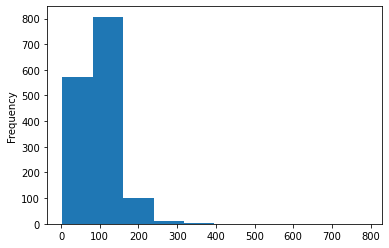

In [68]:
data_balanced.len.plot(kind="hist")

KeyboardInterrupt: 

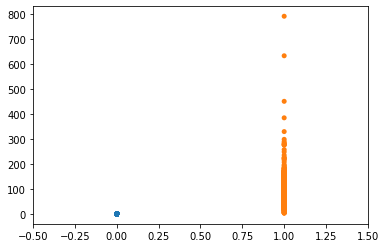

In [71]:
sns.swarmplot(data=data_balanced)

Сколько деревьев мы обучили? Сколько было бы достаточно для получения текущего качества?
(подсказка: посмотрите на loss и n_estimators)

**Early stopping** - метод, при котором перестаем обучаться, если ошибка не уменьшается/ уменьшается незначительно. За это отвечают следующие параметры модели:

- tol : tolerance for the early stopping, оставим значение дефолтным
- n_iter_no_change :  останавливаем ли обучение, если validation score больше не увеличивается<br>
(если функция ошибки(train loss) не уменьшается хотя бы на tol в течение n_iter_no_change итераций, то прекращаем обучение)

In [83]:
gb_clf_es = GradientBoostingClassifier(n_iter_no_change=20, verbose=1)

In [84]:
gb_clf_es.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3335            4.22s
         2           1.2889           10.61s
         3           1.2469            9.00s
         4           1.2115            7.74s
         5           1.1790            6.52s
         6           1.1499            5.71s
         7           1.1231            5.12s
         8           1.0978            4.70s
         9           1.0745            4.40s
        10           1.0521            4.30s
        20           0.8883            3.48s
        30           0.7770            2.65s
        40           0.6957            2.40s
        50           0.6339            1.87s
        60           0.5808            1.52s
        70           0.5426            1.21s
        80           0.5074            0.81s
        90           0.4784            0.39s
       100           0.4518            0.00s


GradientBoostingClassifier(n_iter_no_change=20, verbose=1)

In [86]:
es_y_pred = gb_clf_es.predict(X_test)

In [85]:
print(classification_report(y_test, es_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       106
           1       0.96      0.84      0.90       119

    accuracy                           0.90       225
   macro avg       0.90      0.90      0.90       225
weighted avg       0.91      0.90      0.90       225



In [78]:
print(confusion_matrix(y_test, es_y_pred))

[[102   4]
 [ 19 100]]


Сравнивая метрики, какой алгоритм оказался лучше?

## Дополнительно

Попробуйте провести больше экспериментов: измените количество деревьев в ансамбле (n_estimators) и другие параметы в моделях. Как изменения отразятся на метриках качества?